In [17]:
# Installing Required Libraries
!pip install matplotlib
!pip install pandas
!pip install seaborn

In [18]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Loading Dataset
data = pd.read_csv('heart_disease.csv')

data

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,None,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,None,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [20]:
# Dataset Information
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   9968 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [21]:
# Choosing Relevant Columns
data = data[['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Diabetes', 'BMI', 'Fasting Blood Sugar', 'High Blood Pressure', 'High LDL Cholesterol', 'Low HDL Cholesterol', 'Heart Disease Status']]
data

,Age,Gender,Blood Pressure,Cholesterol Level,Diabetes,BMI,Fasting Blood Sugar,High Blood Pressure,High LDL Cholesterol,Low HDL Cholesterol,Heart Disease Status
0,56.0,Male,153.0,155.0,No,24.991591,NaN,Yes,No,Yes,No
1,69.0,Female,146.0,286.0,Yes,25.221799,157.0,No,No,Yes,No
2,46.0,Male,126.0,216.0,No,29.855447,92.0,No,Yes,Yes,No
3,32.0,Female,122.0,293.0,No,24.130477,94.0,Yes,Yes,No,No
4,60.0,Male,166.0,242.0,Yes,20.486289,154.0,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,No,18.788791,133.0,Yes,Yes,No,Yes
9996,38.0,Male,172.0,154.0,No,31.856801,83.0,Yes,Yes,No,Yes
9997,73.0,Male,152.0,201.0,Yes,26.899911,88.0,No,Yes,Yes,Yes
9998,23.0,Male,142.0,299.0,Yes,34.964026,153.0,Yes,Yes,No,Yes


In [22]:
# Checking Missing Values
data.isnull().sum()

Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Diabetes                30
BMI                     22
Fasting Blood Sugar     22
High Blood Pressure     26
High LDL Cholesterol    26
Low HDL Cholesterol     25
Heart Disease Status     0
dtype: int64

In [23]:
# Checking for Duplicates
data.duplicated().sum()

0

In [24]:
# Dropping and Checking Missing Values
data = data.dropna()
data.isnull().sum()

#no need to drop for duplicates because there are none

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Diabetes                0
BMI                     0
Fasting Blood Sugar     0
High Blood Pressure     0
High LDL Cholesterol    0
Low HDL Cholesterol     0
Heart Disease Status    0
dtype: int64

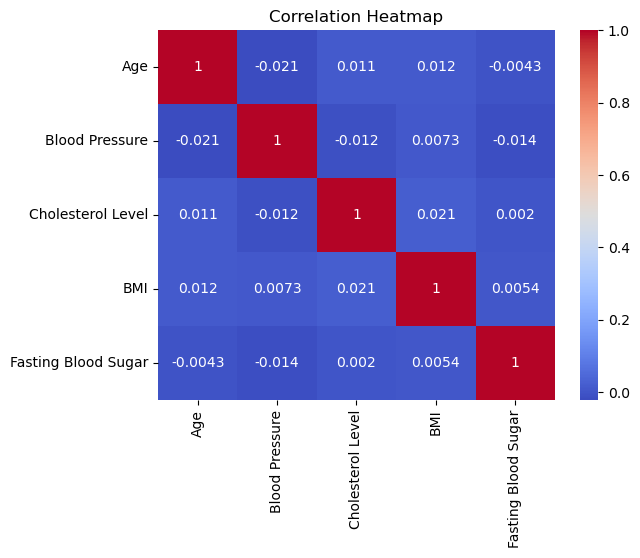

In [25]:
# Heatmap of Correlation
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:

df = data.copy()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

df

,Age,Gender,Blood Pressure,Cholesterol Level,Diabetes,BMI,Fasting Blood Sugar,High Blood Pressure,High LDL Cholesterol,Low HDL Cholesterol,Heart Disease Status
1,69.0,0,146.0,286.0,1,25.221799,157.0,0,0,1,0
2,46.0,1,126.0,216.0,0,29.855447,92.0,0,1,1,0
3,32.0,0,122.0,293.0,0,24.130477,94.0,1,1,0,0
4,60.0,1,166.0,242.0,1,20.486289,154.0,1,0,0,0
5,25.0,1,152.0,257.0,0,28.144681,91.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0,136.0,243.0,0,18.788791,133.0,1,1,0,1
9996,38.0,1,172.0,154.0,0,31.856801,83.0,1,1,0,1
9997,73.0,1,152.0,201.0,1,26.899911,88.0,0,1,1,1
9998,23.0,1,142.0,299.0,1,34.964026,153.0,1,1,0,1


In [27]:
x = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
# Normalization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
# Model Training
model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced_subsample',
    max_depth=None,
    random_state=42
)

model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=300,
                       random_state=42)

Accuracy: 0.805228088159918
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1571
           1       0.00      0.00      0.00       380

    accuracy                           0.81      1951
   macro avg       0.40      0.50      0.45      1951
weighted avg       0.65      0.81      0.72      1951



c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


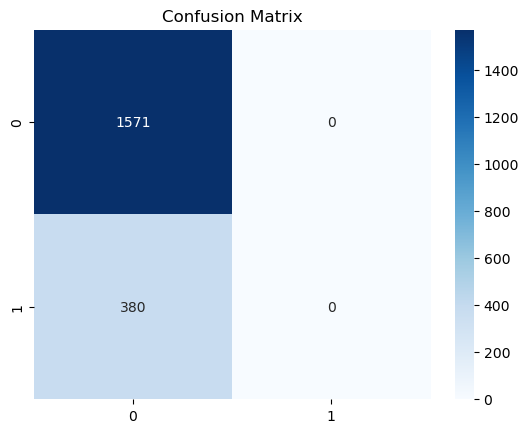

In [30]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Checking Data Distribution
data['Heart Disease Status'].value_counts()
data['Heart Disease Status'].value_counts(normalize=True) * 100

No     79.911813
Yes    20.088187
Name: Heart Disease Status, dtype: float64

In [37]:
importances = pd.Series(model.feature_importances_, index=x.columns)
importances.sort_values(ascending=False)

BMI                     0.202104
Cholesterol Level       0.182848
Fasting Blood Sugar     0.171678
Age                     0.163882
Blood Pressure          0.163132
High Blood Pressure     0.024880
Diabetes                0.024863
High LDL Cholesterol    0.024357
Low HDL Cholesterol     0.023237
Gender                  0.019019
dtype: float64

<AxesSubplot:xlabel='Heart Disease Status', ylabel='Cholesterol Level'>

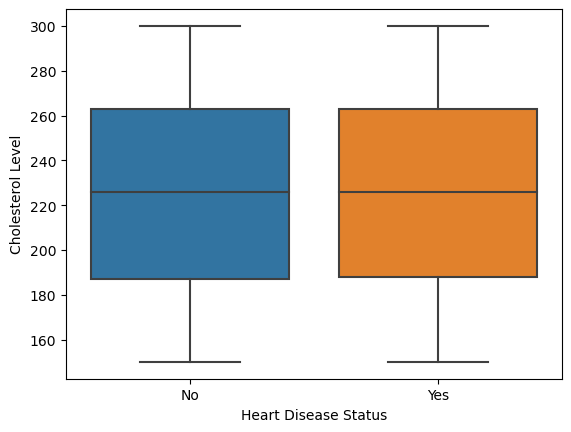

In [38]:
sns.boxplot(data=data, x='Heart Disease Status', y='Cholesterol Level')